In [2]:
import pandas as pd

data = pd.read_csv('results.csv')

In [3]:
data['Performance Loss'] = data['Prior Performance (Actual)'] - data['Post Performance']

In [4]:
data['Performance Loss Ratio'] = data['Performance Loss'] / data['Prior Performance (Actual)']

In [5]:
# Describe the data
data['Performance Loss'].describe()

count    100.000000
mean      96.314587
std       28.848578
min        9.722697
25%       79.473923
50%       97.277141
75%      117.525286
max      169.686665
Name: Performance Loss, dtype: float64

In [6]:
data['Performance Loss Ratio'].describe()

count    100.000000
mean       0.070883
std        0.021406
min        0.007108
25%        0.059516
50%        0.072473
75%        0.085431
max        0.137300
Name: Performance Loss Ratio, dtype: float64

In [7]:
import numpy as np
confidence_interval = np.percentile(data['Performance Loss Ratio'], [2.5, 97.5])
print(f"The 95% confidence interval for the performance loss ratio is {confidence_interval}")

The 95% confidence interval for the performance loss ratio is [0.0258768  0.10627784]


c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


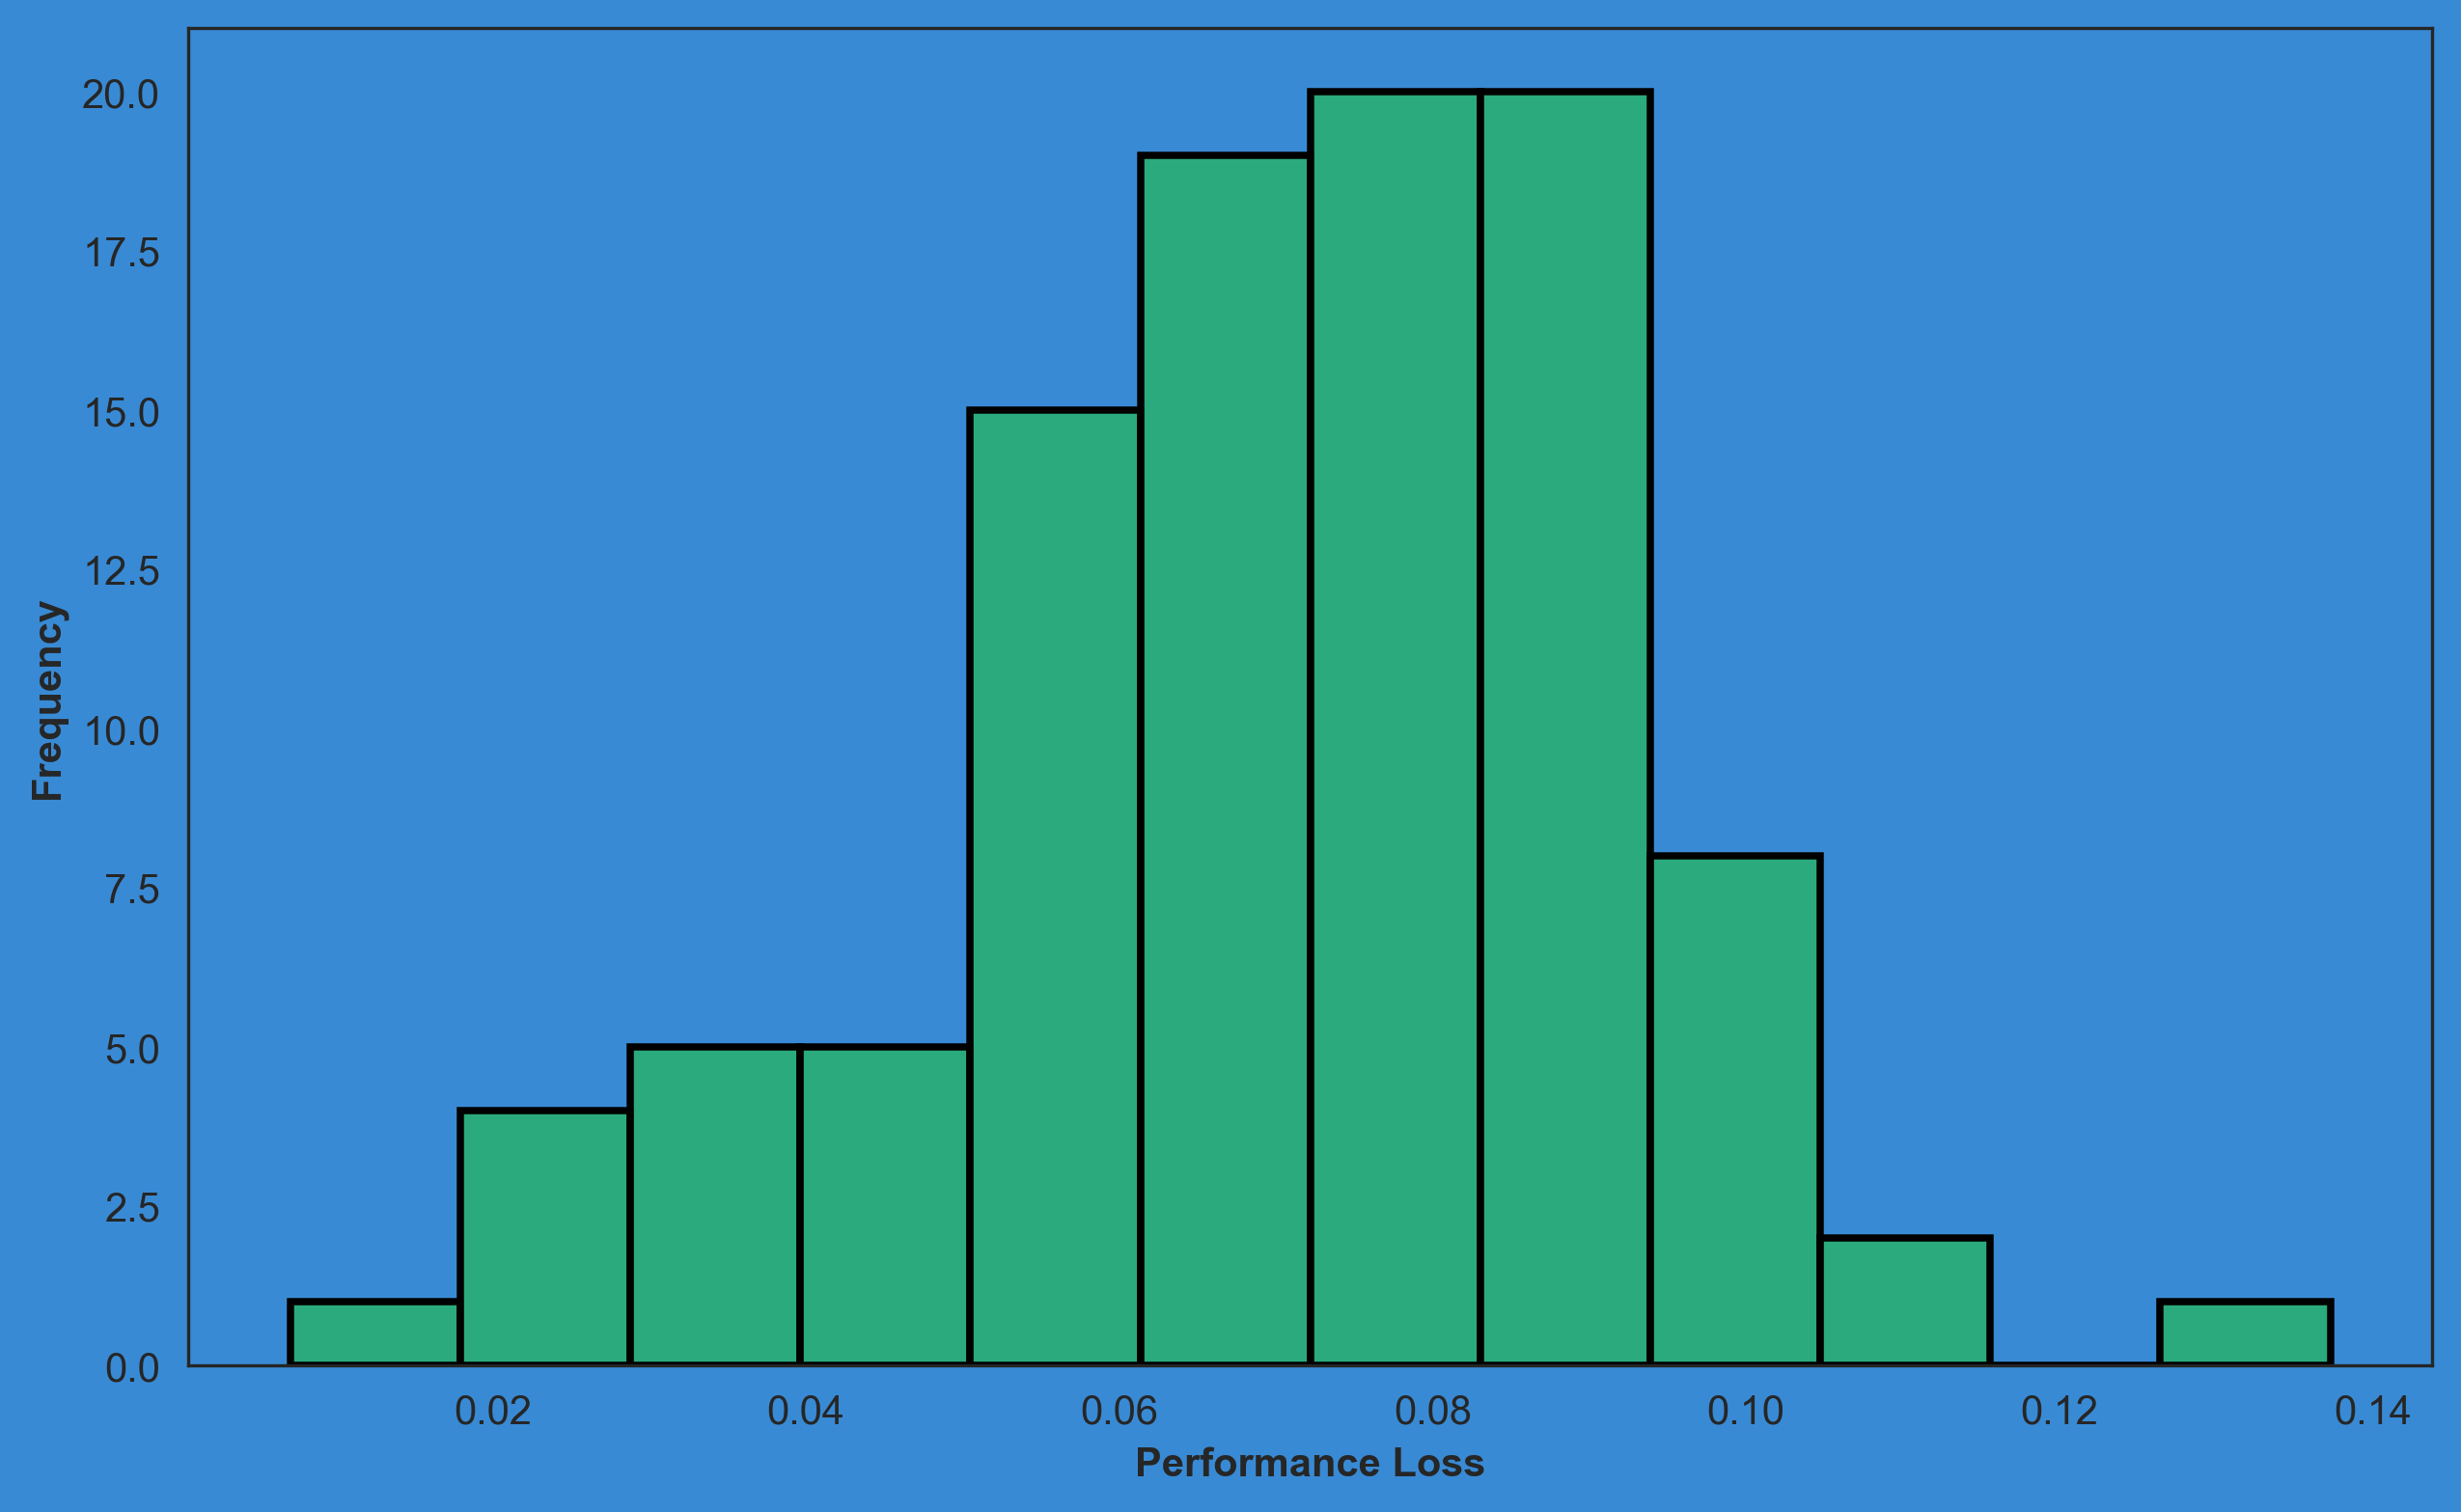

In [49]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('white')


fig,axs = plt.subplots(figsize=(10, 6), dpi=300)

# Set face color
fig.patch.set_facecolor('#398AD4')
axs.set_facecolor('#398AD4')
#sns.histplot(data['Performance Loss Ratio'], color=sns.color_palette('Set2')[2])
sns.histplot(data['Performance Loss Ratio'], color='#27b560', edgecolor='black', linewidth=1.8)
#sns.histplot(data['Performance Loss Ratio'], color='#1EAD2D', edgecolor='black')
plt.xlabel('Performance Loss', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.savefig('perfloss.png', dpi=300, bbox_inches='tight')

c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

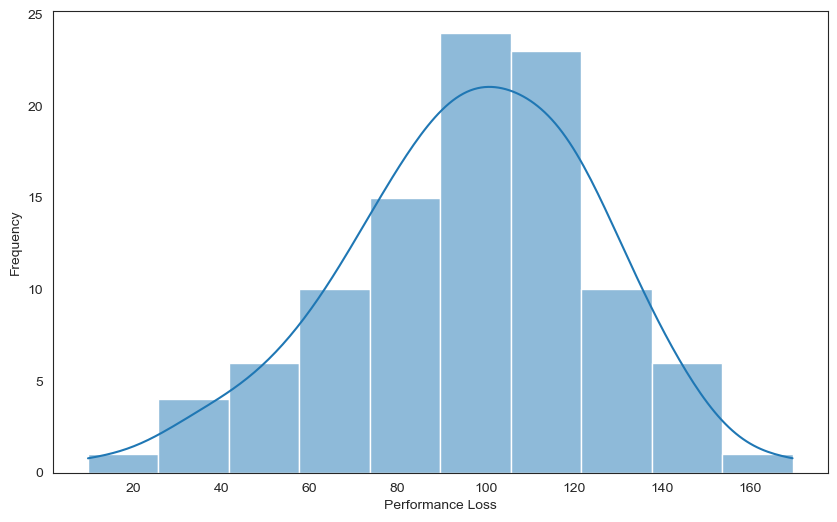

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Performance Loss'], kde=True)
plt.xlabel('Performance Loss')
plt.ylabel('Frequency')

In [9]:
a_data = pd.read_csv('alpha_results.csv')

In [10]:
# Calculate performance loss
a_data['Performance Loss'] = a_data['Prior Performance (Actual)'] - a_data['Post Performance']
a_data['Performance Loss Ratio'] = a_data['Performance Loss'] / a_data['Prior Performance (Actual)']

c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\natem\MiniConda3\envs\dscience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

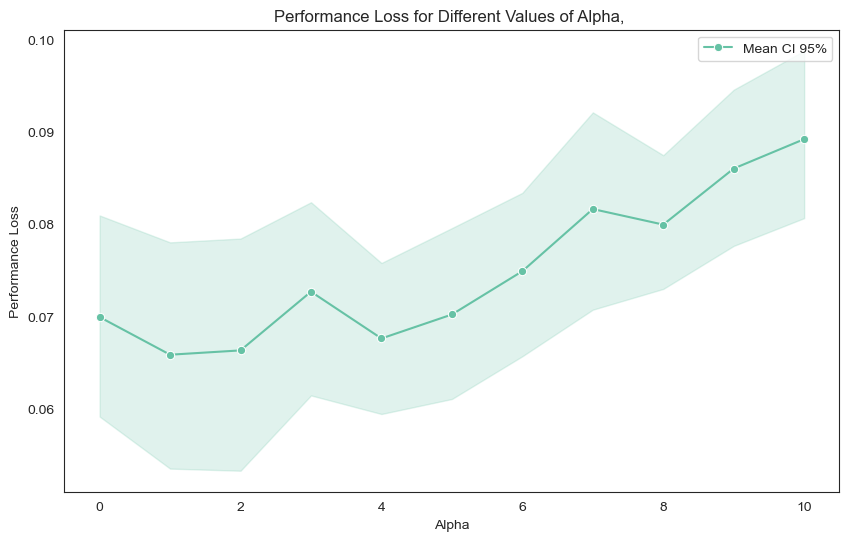

In [11]:
# Calculate the means and standard deviations for each alpha
means = a_data.groupby('Alpha')['Post Performance'].mean()
stds = a_data.groupby('Alpha')['Post Performance'].std()

# Plot the means and standard deviations
plt.figure(figsize=(10, 6))
#sns.lineplot(x=means.index, y=means, color=sns.color_palette('Set2')[0], errorbar=('sd'), label='Mean')
sns.lineplot(data=a_data, x='Alpha', y='Performance Loss Ratio', color=sns.color_palette('Set2')[0], errorbar=('ci', 95), marker='o', label='Mean CI 95%')
plt.title('Performance Loss for Different Values of Alpha, ')
plt.xlabel('Alpha')
plt.ylabel('Performance Loss')
plt.show()